In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

This code incorporates sentiment analysis of user feedback and adjusts the rankings of recommended movies accordingly based on the sentiment (positive, negative, or neutral). The sentiment thresholds (0.05 and -0.05) can be adjusted based on your specific requirements.

In [3]:
movies_data =pd.read_csv('movies.csv')
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# Display the shape
display (movies_data.shape)

(4803, 24)

In [5]:
# Selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [6]:
# Display the info
display (movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [7]:
# Check for Null Values
display (movies_data.isna().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [8]:
# Display the selected columns
display (movies_data[selected_features].head())

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [9]:
# Check Null Values in selected columns
display (movies_data[selected_features].isna().sum())

genres       28
keywords    412
tagline     844
cast         43
director     30
dtype: int64

In [11]:
# Replacing the null values with null string

for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')
display (movies_data.head())

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# Genre and Keyword Analysis
def analyze_genres_keywords(movie_data):
    all_genres = ' '.join(movie_data['genres']).split()
    all_keywords = ' '.join(movie_data['keywords']).split()

    common_genres = pd.Series(all_genres).value_counts()
    common_keywords = pd.Series(all_keywords).value_counts()

    return common_genres, common_keywords

common_genres, common_keywords = analyze_genres_keywords(movies_data)
print("Most Common Genres:", common_genres.head())
print("Most Common Keywords:", common_keywords.head())


Most Common Genres: Drama       2297
Comedy      1722
Thriller    1259
Action      1153
Romance      890
dtype: int64
Most Common Keywords: relationship    337
of              336
on              331
based           303
film            276
dtype: int64


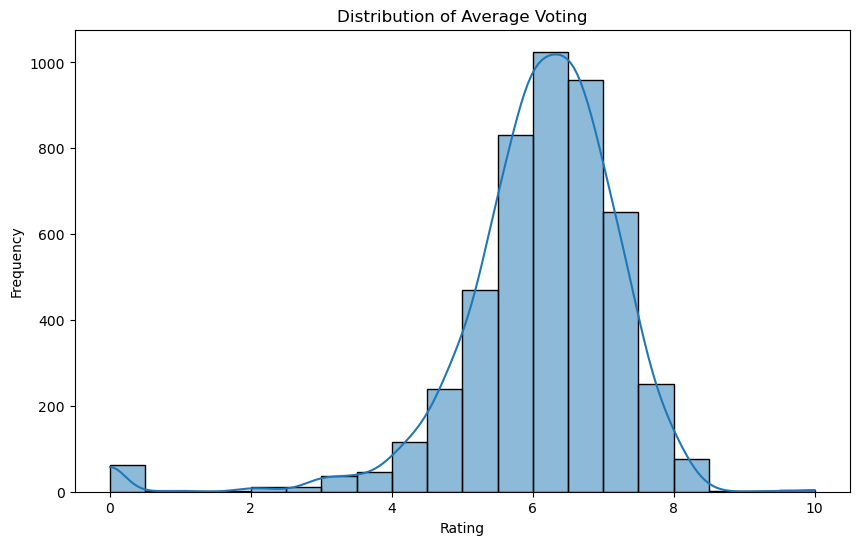

In [12]:
# Visualizations of Distribution of Average Voting
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['vote_average'], bins=20, kde=True)
plt.title('Distribution of Average Voting')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

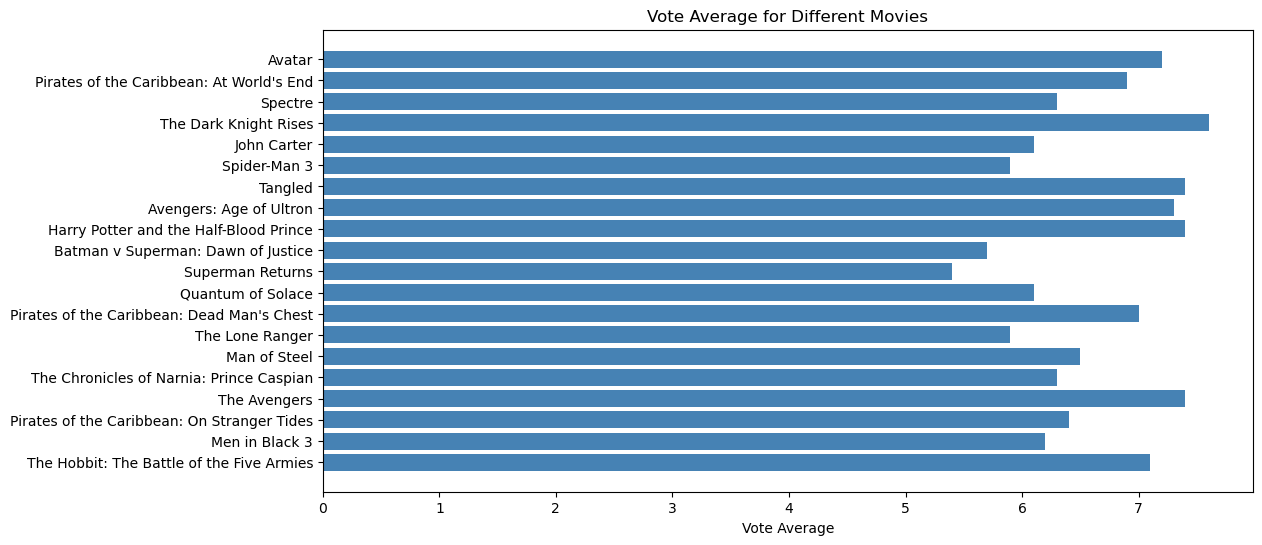

In [13]:
movie_titles = movies_data['title'][:20]
vote_average_values = movies_data['vote_average'][:20]

# Plotting the 'vote_average' for different movies
plt.figure(figsize=(12, 6))
plt.barh(movie_titles, vote_average_values, color='steelblue')
plt.xlabel('Vote Average')
plt.title('Vote Average for Different Movies')
plt.gca().invert_yaxis()  # To display the highest-rated movie at the top
plt.show()

In [14]:
# Combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
display (combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [15]:
# Converting the text data to feature vectors
# This is to find cosine similarity

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)

(4803, 17318)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [16]:
# Getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print  (similarity )

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [17]:
# Print Shape Cosine Similarity
display(similarity.shape)

(4803, 4803)

In [18]:
# Enter the movie name to get Similarity
movie_name = input(' Enter your favourite movie name : ')

# Creating a list with all the movie names given in the dataset
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

# Length of the List
len(list_of_all_titles)

 Enter your favourite movie name : titanic
['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Ma

4803

In [19]:
# Finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Titanic', 'Maniac', 'Hitman']


In [20]:
# Display the close match
close_match = find_close_match[0]
print(close_match)

Titanic


In [21]:
# Finding the index of the movie with the title
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

25


In [22]:
# Get the similarity row for the selected index
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)
# Length of Similarity Score
len(similarity_score)

[(0, 0.042849260959502256), (1, 0.0), (2, 0.011467364105495693), (3, 0.010046067299207014), (4, 0.010913900929666012), (5, 0.013271868195005245), (6, 0.0), (7, 0.044276351205847934), (8, 0.0), (9, 0.011052967674011078), (10, 0.040774737457045525), (11, 0.005154880168301485), (12, 0.0), (13, 0.011810642378201048), (14, 0.011135108727728622), (15, 0.010700980101090706), (16, 0.010727286350311038), (17, 0.0), (18, 0.0), (19, 0.058321349267840134), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0030136767341105873), (25, 1.0), (26, 0.0), (27, 0.035917907722692974), (28, 0.005803448123074126), (29, 0.017798015596744536), (30, 0.012912217205854762), (31, 0.011014776597901378), (32, 0.010369537913084386), (33, 0.017063631264570202), (34, 0.02704944297060011), (35, 0.0), (36, 0.0), (37, 0.049954284113239336), (38, 0.01143873602257278), (39, 0.0), (40, 0.0), (41, 0.005589882450477922), (42, 0.0), (43, 0.005898442690409995), (44, 0.013809733743104848), (45, 0.01978396131348192), (46, 0.02308

4803

In [23]:
# Sorting the movies based on their similarity score
# Display the index and similarity rating as a tuple
#  This list is sorted based on the similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(25, 1.0), (593, 0.23007271072115248), (454, 0.1658990773043873), (1081, 0.1603512882331143), (2011, 0.13803443166572782), (3631, 0.1333839815786052), (4133, 0.13183140853614747), (656, 0.1260624612880309), (1985, 0.12349759621747015), (2036, 0.12348320550112098), (316, 0.11879207685844574), (142, 0.11838847957751894), (2449, 0.11814094328522082), (846, 0.11610782635112266), (49, 0.11503079796465221), (765, 0.11360426444934431), (439, 0.11317975752102442), (2245, 0.11276113457467148), (720, 0.10752741389011593), (1362, 0.10696934437645385), (1629, 0.10631964670577464), (1500, 0.10616709183973469), (972, 0.10565080846258224), (622, 0.10374165072398073), (2955, 0.10279003651035283), (2175, 0.10248148361918039), (250, 0.10070176966728618), (4231, 0.09751550112290146), (1089, 0.09711335392784962), (2008, 0.09668793526881608), (961, 0.09638190705612416), (351, 0.09601987660900405), (3533, 0.09505757385996452), (249, 0.09498018720867243), (176, 0.09472769132005915), (2152, 0.094352555372053

In [24]:
# Print the name of similar movies based on the index – Top 10

print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Titanic
2 . The Dilemma
3 . The Day the Earth Stood Still
4 . Revolutionary Road
5 . Cheri
6 . Heavenly Creatures
7 . Plush
8 . Primary Colors
9 . The Bridge of San Luis Rey
10 . Saving Silverman
11 . Gangs of New York
12 . Flushed Away
13 . Sense and Sensibility
14 . Stuck on You
15 . The Great Gatsby
16 . Almost Famous
17 . Shutter Island
18 . The Brothers Bloom
19 . Contagion
20 . The Blind Side
21 . Little Black Book
22 . This Is the End
23 . The Host
24 . Body of Lies
25 . Romance & Cigarettes
26 . Ladyhawke
27 . The Aviator
28 . The Believer
29 . The Phantom


In [25]:
#Recommendation function
def recommend_movies(movie_data, similarity_matrix, movie_name, top_n=10):
    list_of_all_titles = movie_data['title'].tolist()

    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

    if not find_close_match:
        print("Sorry, we couldn't find a close match for your movie.")
        return

    close_match = find_close_match[0]

    index_of_the_movie = movie_data[movie_data.title == close_match]['index'].values[0]

    similarity_score = list(enumerate(similarity_matrix[index_of_the_movie]))

    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)[:top_n]

    print(f'Movies suggested for you based on "{movie_name}":\n')
    for rank, (index, score) in enumerate(sorted_similar_movies, 1):
        title_from_index = movie_data.loc[index, 'title']
        print(f'{rank}. {title_from_index} (Similarity Score: {score:.4f})')


movie_name = input('Enter your favorite movie name: ')
recommend_movies(movies_data, similarity, movie_name, top_n=10)


Enter your favorite movie name: Titanic
Movies suggested for you based on "Titanic":

1. Titanic (Similarity Score: 1.0000)
2. The Dilemma (Similarity Score: 0.2301)
3. The Day the Earth Stood Still (Similarity Score: 0.1659)
4. Revolutionary Road (Similarity Score: 0.1604)
5. Cheri (Similarity Score: 0.1380)
6. Heavenly Creatures (Similarity Score: 0.1334)
7. Plush (Similarity Score: 0.1318)
8. Primary Colors (Similarity Score: 0.1261)
9. The Bridge of San Luis Rey (Similarity Score: 0.1235)
10. Saving Silverman (Similarity Score: 0.1235)


In [26]:
# Genre-Based Recommendations:
def recommend_movies_by_genre(movie_data, genre, similarity_matrix, top_n=10):
    # Filtering movies by the specified genre
    genre_movies = movie_data[movie_data['genres'].str.contains(genre, case=False)]

    # Calculating average similarity score for the genre
    average_similarity = similarity_matrix[genre_movies.index].mean(axis=0)

    # Get top recommendations for the genre
    sorted_genre_recommendations = np.argsort(average_similarity)[::-1][:top_n]

    print(f'Movies suggested for the "{genre}" genre:\n')
    for rank, index in enumerate(sorted_genre_recommendations, 1):
        title = movie_data.loc[index, 'title']
        print(f'{rank}. {title}')

genre_input = input('Enter your preferred genre: ')
recommend_movies_by_genre(movies_data, genre_input, similarity, top_n=10)


Enter your preferred genre: Romance
Movies suggested for the "Romance" genre:

1. My Best Friend's Wedding
2. The Object of My Affection
3. Autumn in New York
4. Down to You
5. Chasing Amy
6. Accidental Love
7. The Last Song
8. Return to Me
9. She's the One
10. How Do You Know
